# Basic Finance
## Ty Preiss

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

In [3]:
Walmart = data.DataReader("WMT", 'yahoo', start, end)
Target = data.DataReader("TGT", 'yahoo', start, end)

Here I am importing the data.

# Question 2

In [7]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021,12,31)

In [8]:
Walmart.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,146.889999,144.279999,144.300003,146.529999,10727400.0,144.236282
2021-01-05,147.070007,144.490005,146.600006,145.750000,8832700.0,143.468475
2021-01-06,148.100006,145.009995,145.089996,146.660004,7306300.0,144.364258
2021-01-07,147.759995,146.039993,147.619995,146.649994,6846000.0,144.354401
2021-01-08,147.000000,145.809998,146.880005,146.630005,8159400.0,144.334717


In [9]:
Target.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,178.089996,174.119995,176.509995,177.630005,3463100.0,174.467789
2021-01-05,181.970001,176.429993,176.800003,180.369995,4843300.0,177.159012
2021-01-06,189.470001,180.110001,180.330002,188.919998,5610100.0,185.556808
2021-01-07,192.350006,189.169998,189.210007,191.100006,4226700.0,187.697998
2021-01-08,193.880005,190.809998,191.580002,193.600006,3321500.0,190.153488


Here is the data from the 1st of January 2021 to the 31st of December 2021.

# Question 3

In [10]:
Walmart['%-chg'] = Walmart['Close'].pct_change()
Target['%-chg'] = Target['Close'].pct_change()

In [12]:
Walmart['Log Returns'] = np.log(Walmart['Close']/Walmart['Close'].shift())
Target['Log Returns'] = np.log(Target['Close']/Target['Close'].shift())

In [17]:
Walmart.tail()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log Returns
Date,,,,,,,,
2021-12-27,140.869995,139.570007,139.600006,140.759995,5346900.0,140.759995,0.009105,0.009063
2021-12-28,142.970001,140.600006,140.600006,142.779999,5261000.0,142.779999,0.014351,0.014249
2021-12-29,143.529999,142.320007,142.660004,142.710007,4348400.0,142.710007,-0.000490,-0.000490
2021-12-30,143.699997,142.479996,143.259995,143.169998,4983000.0,143.169998,0.003223,0.003218
2021-12-31,145.039993,142.919998,143.199997,144.690002,5982600.0,144.690002,0.010617,0.010561


In [16]:
Target.tail()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log Returns
Date,,,,,,,,
2021-12-27,224.690002,220.860001,222.100006,224.100006,4335600.0,223.132996,0.013981,0.013884
2021-12-28,227.500000,223.639999,224.449997,224.910004,3202400.0,223.939499,0.003614,0.003608
2021-12-29,229.570007,225.369995,225.369995,227.919998,3065800.0,226.936508,0.013383,0.013294
2021-12-30,233.869995,228.800003,228.800003,231.910004,4007400.0,230.909286,0.017506,0.017355
2021-12-31,233.619995,229.220001,232.770004,231.440002,2485100.0,230.441315,-0.002027,-0.002029


Here we made the two new columns of %-chg and Log Returns at the end.

# Question 4

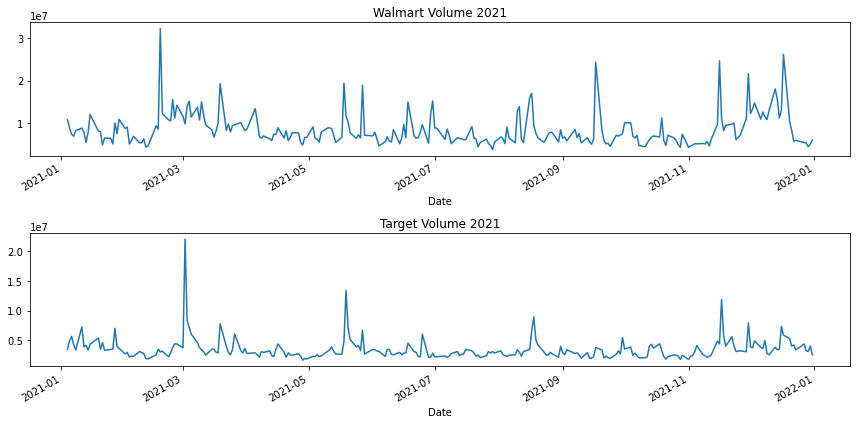

In [15]:
fig, ax = plt.subplots(2)
Walmart['Volume'].loc['2021-01-01':].plot(ax=ax[0], title="Walmart Volume 2021", figsize=(12,6))
Target['Volume'].loc['2021-01-01':].plot(ax=ax[1], title="Target Volume 2021", figsize=(12,6))

fig.tight_layout()

Walmart seems to have the highest overall volume because Target barely ever gets over 1.  Walmart and Targets highest point which is around the middle of February to early March.

# Question 5

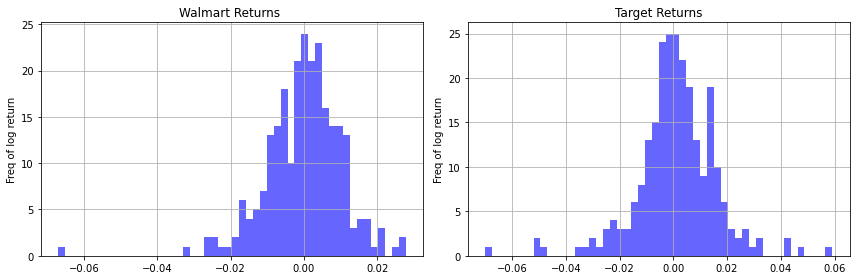

In [19]:
fig, ax = plt.subplots(1,2)
Walmart['Log Returns'].hist(ax=ax[0], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[0].set_ylabel("Freq of log return")
ax[0].set_title("Walmart Returns ")

Target['Log Returns'].hist(ax=ax[1], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[1].set_ylabel("Freq of log return")
ax[1].set_title("Target Returns")

fig.tight_layout()

Walmarts returns seem to be more normalized with less outliers unlike Target.  Target has many log return outliers on both the positive and negative side.  It looks like Walmart is more normal.

# Question 6

In [20]:
Walmart['Log Returns'].std() #Here we built the standard deviation of Log Returns in Walmart and Target

0.010566097093939207

In [21]:
Target['Log Returns'].std()

0.014964775897820567

In [22]:
Walmart_volatility = Walmart['Log Returns'].std()*np.sqrt(252) #Now we are making the volatility of Walmart and Target

In [23]:
Walmart_volatility

0.16773159143475252

In [24]:
Target_volatility = Target['Log Returns'].std()*np.sqrt(252)

In [25]:
Target_volatility

0.2375584527086793

Target has a much higher volatility by around 7%. This means that Targets stock is more risky to get into, but it still is not as risky as Lyft or Uber.